# Homework 1
- Tommaso Bertola 2086990
- Giacomo Di Prima 2086992
- Giuseppe Viterbo 2086516
- Marzo Zenari 2097012

In [1]:
#DNN library
import tensorflow as tf
import keras, sklearn
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow.random as tf_r


tf_r.set_seed(12345)


#common libraries
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rc('image', cmap='copper') #global colormap 

#random seed
seed=1
np.random.seed(seed) # fix random seed




# default font
plt.rcParams['font.size'] = 15

In [2]:
%run nonlinear_function.py #here is loaded the filename, to be run only once

In [3]:
# Keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(f'Dimension of a sample {L}')

#training percentage
perc_train = 0.8


N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

Dimension of a sample 2
data: 4000
train: 3200


In [4]:
### Split training and test data
(x_train, y_train) = (x[0:N_train],y[0:N_train]) #they are already shuffle 
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [5]:
### Rescale input data

def Rescale(x):
    return x/50 #the number goes from -50 to 50, so we put them between -1 and 1 to use the non linearity 

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

### Define the model with Keras / Tensorflow

In [6]:
def create_DNN(act_func, neurons): 
    model = Sequential() #empty template of the neural network
    model.add(Dense(L,input_shape=(L,),activation=act_func)) #add a layer dense (all connection) with a ReLu 2 neuron for 2 x_i
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dropout(0.01)) #it is applied to the last layer, need to be reader in keras documentation 
    model.add(Dense(1,activation='sigmoid'))
        
    return model 

### Optimization method and cost function

In [7]:
def compile_model(optimizer='adam', act_func='relu', neurons=30):
    model = create_DNN(act_func, neurons)
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])    
    return model

In [10]:
nepochs=150

model = compile_model(optimizer='Adam',
                      act_func='ReLU',
                      neurons=30)

history = model.fit(x_train, y_train,
                    epochs = nepochs,
                    batch_size = 10,
                    validation_data=(x_valid,y_valid),
                    verbose=1)

Epoch 1/150
320/320 [==============================] - 1s 2ms/step - loss: 0.6374 - accuracy: 0.6291 - val_loss: 0.5886 - val_accuracy: 0.6675
Epoch 2/150
320/320 [==============================] - 1s 2ms/step - loss: 0.5707 - accuracy: 0.6722 - val_loss: 0.5387 - val_accuracy: 0.7225
Epoch 3/150
320/320 [==============================] - 1s 2ms/step - loss: 0.5262 - accuracy: 0.7072 - val_loss: 0.5245 - val_accuracy: 0.7250
Epoch 4/150
320/320 [==============================] - 1s 2ms/step - loss: 0.5001 - accuracy: 0.7334 - val_loss: 0.4829 - val_accuracy: 0.7475
Epoch 5/150
320/320 [==============================] - 1s 3ms/step - loss: 0.4771 - accuracy: 0.7419 - val_loss: 0.4811 - val_accuracy: 0.7462
Epoch 6/150
320/320 [==============================] - 1s 2ms/step - loss: 0.4605 - accuracy: 0.7547 - val_loss: 0.4499 - val_accuracy: 0.7500
Epoch 7/150
320/320 [==============================] - 1s 2ms/step - loss: 0.4439 - accuracy: 0.7541 - val_loss: 0.4282 - val_accuracy: 0.7812

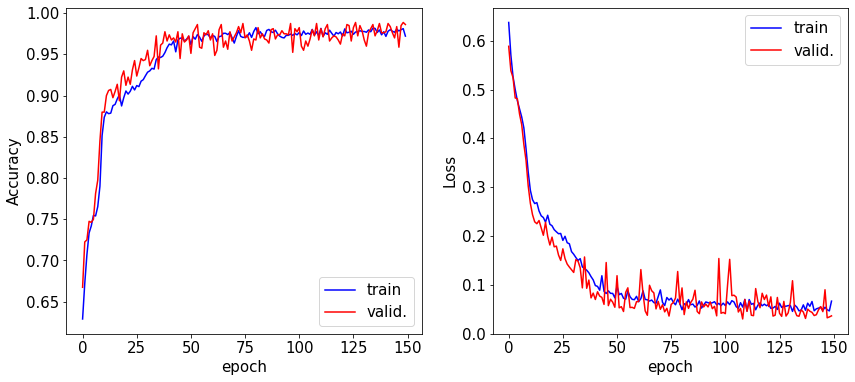

In [11]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(history.history['accuracy'],label="train",c="b")
ax.plot(history.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(history.history['loss'],label="train",c="b")
ax.plot(history.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [12]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model.predict(grid_r)

51 2601
[50. 50.]


<function matplotlib.pyplot.show(close=None, block=None)>

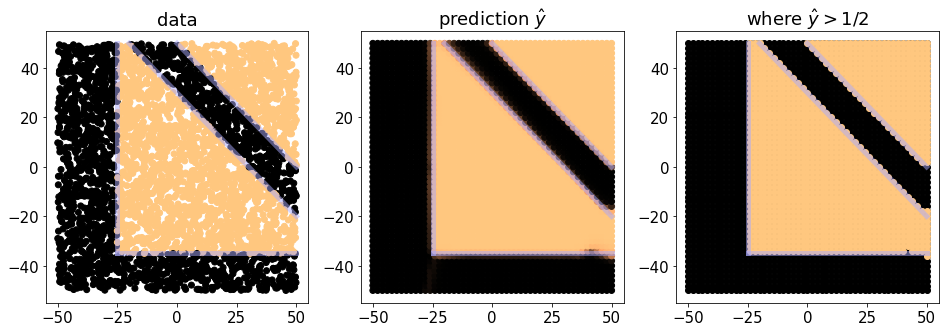

In [13]:
def boundaries():  
    x1=-25
    y1=-35
    c="#AAAAFF"
    a=0.5
    lw=5
    ax.plot((50,-20),(-20,50),c=c,alpha=a,lw=lw)
    ax.plot((50,0),(0,50),c=c,alpha=a,lw=lw)
    ax.plot((x1,50),(y1,y1),c=c,alpha=a,lw=lw)
    ax.plot((x1,x1),(y1,50),c=c,alpha=a,lw=lw)


fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax.set_title("data")
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax.set_title("prediction $\\hat y$")
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
boundaries()
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show

## EX.1 Modify the Hyperparameters to Optimize Performance of the Model

In [15]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [18]:
# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adam']
act_func = ['sigmoid','tanh', 'ReLU']
batch_size = [10, 50]
neurons = [20]
nepochs = 100

# call Keras scikit wrapper
model_gridsearch = KerasClassifier(model=compile_model, 
                        epochs=nepochs, 
                        batch_size=batch_size,
                        act_func=act_func,
                        model__neurons=neurons,
                        verbose=1)

# define parameter dictionary
param_grid = dict(optimizer=optimizer,
                  act_func=act_func,
                  batch_size=batch_size,
                  model__neurons=neurons)

print(param_grid)


# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=-1, cv=4)

{'optimizer': ['SGD', 'RMSprop', 'Adam'], 'act_func': ['sigmoid', 'tanh', 'ReLU'], 'batch_size': [10, 50], 'model__neurons': [20]}


In [19]:
grid_result = grid.fit(x_train, y_train)

Epoch 1/100
320/320 [==============================] - 1s 1ms/step - loss: 0.6152 - accuracy: 0.6659
Epoch 2/100
320/320 [==============================] - 0s 1ms/step - loss: 0.5946 - accuracy: 0.6834
Epoch 3/100
320/320 [==============================] - 0s 1ms/step - loss: 0.5861 - accuracy: 0.6781
Epoch 4/100
320/320 [==============================] - 0s 1ms/step - loss: 0.5511 - accuracy: 0.7234
Epoch 5/100
320/320 [==============================] - 0s 1ms/step - loss: 0.5068 - accuracy: 0.7522
Epoch 6/100
320/320 [==============================] - 0s 1ms/step - loss: 0.4852 - accuracy: 0.7613
Epoch 7/100
320/320 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.7650
Epoch 8/100
320/320 [==============================] - 0s 1ms/step - loss: 0.4723 - accuracy: 0.7659
Epoch 9/100
320/320 [==============================] - 1s 2ms/step - loss: 0.4671 - accuracy: 0.7681
Epoch 10/100
320/320 [==============================] - 0s 1ms/step - loss: 0.4633 - accura

In [20]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.981250 using {'act_func': 'tanh', 'batch_size': 10, 'model__neurons': 20, 'optimizer': 'Adam'}
0.765937 (0.009576) with: {'act_func': 'sigmoid', 'batch_size': 10, 'model__neurons': 20, 'optimizer': 'SGD'}
0.767188 (0.009244) with: {'act_func': 'sigmoid', 'batch_size': 10, 'model__neurons': 20, 'optimizer': 'RMSprop'}
0.764375 (0.012200) with: {'act_func': 'sigmoid', 'batch_size': 10, 'model__neurons': 20, 'optimizer': 'Adam'}
0.762813 (0.009244) with: {'act_func': 'sigmoid', 'batch_size': 50, 'model__neurons': 20, 'optimizer': 'SGD'}
0.759688 (0.014641) with: {'act_func': 'sigmoid', 'batch_size': 50, 'model__neurons': 20, 'optimizer': 'RMSprop'}
0.764375 (0.010251) with: {'act_func': 'sigmoid', 'batch_size': 50, 'model__neurons': 20, 'optimizer': 'Adam'}
0.974375 (0.010662) with: {'act_func': 'tanh', 'batch_size': 10, 'model__neurons': 20, 'optimizer': 'SGD'}
0.957812 (0.040576) with: {'act_func': 'tanh', 'batch_size': 10, 'model__neurons': 20, 'optimizer': 'RMSprop'}
0.981250 

In [21]:
print(f'The best parameters are:{grid_result.best_params_},\nwhith a score of {grid_result.best_score_}')

The best parameters are:{'act_func': 'tanh', 'batch_size': 10, 'model__neurons': 20, 'optimizer': 'Adam'},
whith a score of 0.9812500000000001


In [23]:
nepochs=400

model_complete = compile_model(optimizer=grid_result.best_params_['optimizer'], 
                      act_func=grid_result.best_params_['act_func'],
                      neurons=grid_result.best_params_['model__neurons'])

history_complete = model_complete.fit(x_train, y_train,
                    epochs = nepochs,
                    batch_size = grid_result.best_params_['batch_size'],
                    validation_data=(x_valid,y_valid),
                    verbose=1)

Epoch 1/400
320/320 [==============================] - 1s 2ms/step - loss: 0.6374 - accuracy: 0.6606 - val_loss: 0.6022 - val_accuracy: 0.6875
Epoch 2/400
320/320 [==============================] - 1s 2ms/step - loss: 0.5821 - accuracy: 0.6928 - val_loss: 0.5499 - val_accuracy: 0.7450
Epoch 3/400
320/320 [==============================] - 1s 3ms/step - loss: 0.5257 - accuracy: 0.7422 - val_loss: 0.5103 - val_accuracy: 0.7613
Epoch 4/400
320/320 [==============================] - 1s 2ms/step - loss: 0.4922 - accuracy: 0.7744 - val_loss: 0.4874 - val_accuracy: 0.7750
Epoch 5/400
320/320 [==============================] - 1s 3ms/step - loss: 0.4737 - accuracy: 0.7694 - val_loss: 0.4764 - val_accuracy: 0.7738
Epoch 6/400
320/320 [==============================] - 1s 2ms/step - loss: 0.4559 - accuracy: 0.7859 - val_loss: 0.4444 - val_accuracy: 0.8175
Epoch 7/400
320/320 [==============================] - 1s 2ms/step - loss: 0.4400 - accuracy: 0.8078 - val_loss: 0.4290 - val_accuracy: 0.8250

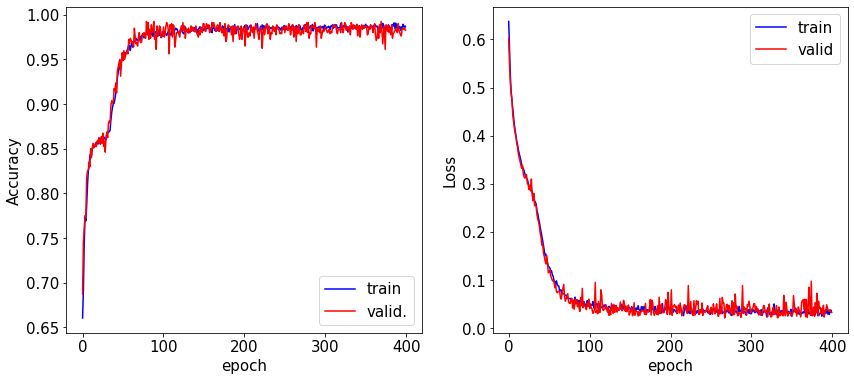

In [26]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(history_complete.history['accuracy'],label="train",c="b")
ax.plot(history_complete.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(history_complete.history['loss'],label="train",c="b")
ax.plot(history_complete.history['val_loss'],label="valid",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

51 2601
[50. 50.]


<function matplotlib.pyplot.show(close=None, block=None)>

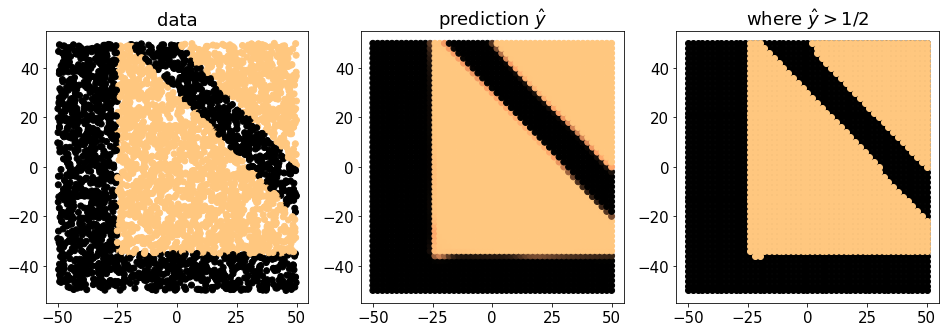

In [27]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model_complete.predict(grid_r)

fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
ax.set_title("data")

ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
ax.set_title("prediction $\\hat y$")

ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show

## Ex.2 Change the number of sample 

### Reduced number of sample

In [32]:
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')

red_val=0.3
(x, y) = (x[:int(red_val*len(x))], y[:int(red_val*len(x))])

N=len(x)
perc_train=0.8
N_train = int(N*perc_train)

(x_train, y_train) = (x[0:N_train],y[0:N_train]) #they are already shuffle 
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))


x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

Train: 960 	 Validation: 240


<function matplotlib.pyplot.show(close=None, block=None)>

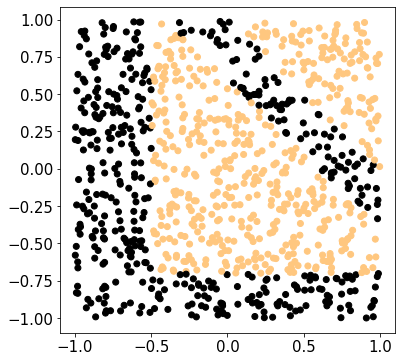

In [33]:
plt.figure(figsize = (6,6))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show

In [34]:
#optimization
nepochs=400
model_reduced = compile_model(optimizer=grid_result.best_params_['optimizer'], 
                              act_func=grid_result.best_params_['act_func'],
                              neurons=grid_result.best_params_['model__neurons'])

history_reduced = model_reduced.fit(x_train, y_train,
                                    epochs = nepochs,
                                    batch_size = grid_result.best_params_['batch_size'],
                                    validation_data=(x_valid,y_valid),
                                    verbose=1)

Epoch 1/400
96/96 [==============================] - 1s 3ms/step - loss: 0.6325 - accuracy: 0.6750 - val_loss: 0.5881 - val_accuracy: 0.7167
Epoch 2/400
96/96 [==============================] - 0s 2ms/step - loss: 0.6031 - accuracy: 0.6906 - val_loss: 0.5865 - val_accuracy: 0.7417
Epoch 3/400
96/96 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.7115 - val_loss: 0.5817 - val_accuracy: 0.7208
Epoch 4/400
96/96 [==============================] - 0s 3ms/step - loss: 0.6001 - accuracy: 0.6958 - val_loss: 0.5818 - val_accuracy: 0.7292
Epoch 5/400
96/96 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.7042 - val_loss: 0.5802 - val_accuracy: 0.7167
Epoch 6/400
96/96 [==============================] - 0s 2ms/step - loss: 0.5982 - accuracy: 0.6979 - val_loss: 0.5779 - val_accuracy: 0.7208
Epoch 7/400
96/96 [==============================] - 0s 3ms/step - loss: 0.5960 - accuracy: 0.7010 - val_loss: 0.5762 - val_accuracy: 0.7167
Epoch 8/400
9

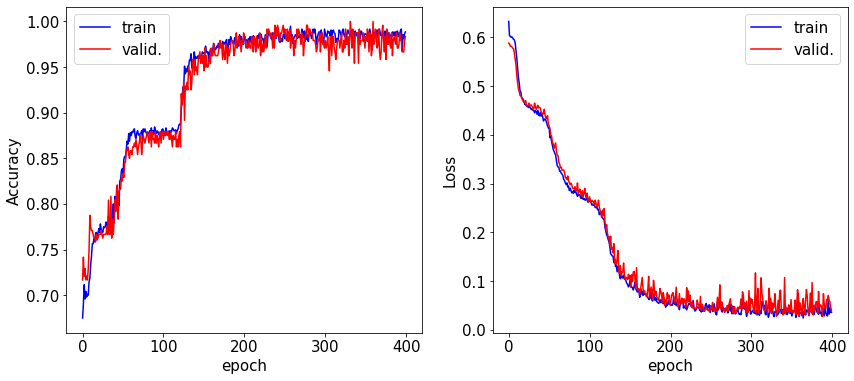

In [35]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(history_reduced.history['accuracy'],label="train",c="b")
ax.plot(history_reduced.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(history_reduced.history['loss'],label="train",c="b")
ax.plot(history_reduced.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

51 2601
[50. 50.]


<function matplotlib.pyplot.show(close=None, block=None)>

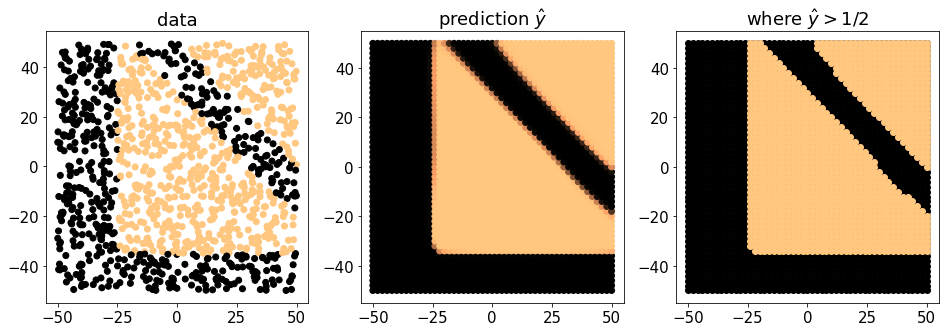

In [36]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model_reduced.predict(grid_r)

fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
ax.set_title("data")

ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
ax.set_title("prediction $\\hat y$")

ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show

### Increased number of sample
We generated two additional file where the numeber of sample is 6000 using the same generate_data_DNN_2023 notebook. In reality this would not be possible as data are often not easily accessible. In that scenario, we would only have used only part of the original dataset in the first part of this notebook and the whole dataset for this latter case.

In [37]:
x = np.loadtxt(filename("data_increased",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels_increased",TYPE), delimiter=' ')

N=len(x)
perc_train=0.8
N_train = int(N*perc_train)

(x_train, y_train) = (x[0:N_train],y[0:N_train]) #they are already shuffle 
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

Train: 4800 	 Validation: 1200


In [38]:
#optimization
nepochs=400
model_increased = compile_model(optimizer=grid_result.best_params_['optimizer'], 
                              act_func=grid_result.best_params_['act_func'],
                              neurons=grid_result.best_params_['model__neurons'])

history_increased = model_increased.fit(x_train, y_train,
                                    epochs = nepochs,
                                    batch_size = grid_result.best_params_['batch_size'],
                                    validation_data=(x_valid,y_valid),
                                    verbose=1)

Epoch 1/400
480/480 [==============================] - 1s 2ms/step - loss: 0.5952 - accuracy: 0.6733 - val_loss: 0.5820 - val_accuracy: 0.6842
Epoch 2/400
480/480 [==============================] - 1s 2ms/step - loss: 0.5432 - accuracy: 0.7300 - val_loss: 0.5062 - val_accuracy: 0.7483
Epoch 3/400
480/480 [==============================] - 1s 2ms/step - loss: 0.4931 - accuracy: 0.7554 - val_loss: 0.4767 - val_accuracy: 0.7567
Epoch 4/400
480/480 [==============================] - 1s 2ms/step - loss: 0.4743 - accuracy: 0.7604 - val_loss: 0.4667 - val_accuracy: 0.7633
Epoch 5/400
480/480 [==============================] - 1s 2ms/step - loss: 0.4638 - accuracy: 0.7681 - val_loss: 0.4607 - val_accuracy: 0.7592
Epoch 6/400
480/480 [==============================] - 1s 2ms/step - loss: 0.4572 - accuracy: 0.7731 - val_loss: 0.4566 - val_accuracy: 0.7617
Epoch 7/400
480/480 [==============================] - 1s 2ms/step - loss: 0.4419 - accuracy: 0.7962 - val_loss: 0.4300 - val_accuracy: 0.8125

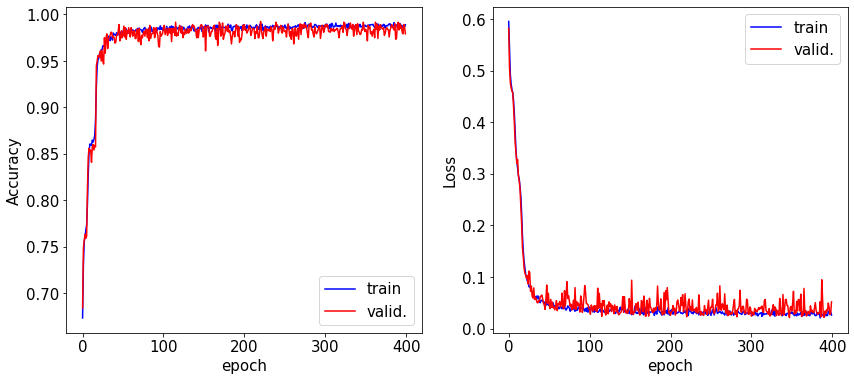

In [39]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(history_increased.history['accuracy'],label="train",c="b")
ax.plot(history_increased.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(history_increased.history['loss'],label="train",c="b")
ax.plot(history_increased.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

51 2601
[50. 50.]


<function matplotlib.pyplot.show(close=None, block=None)>

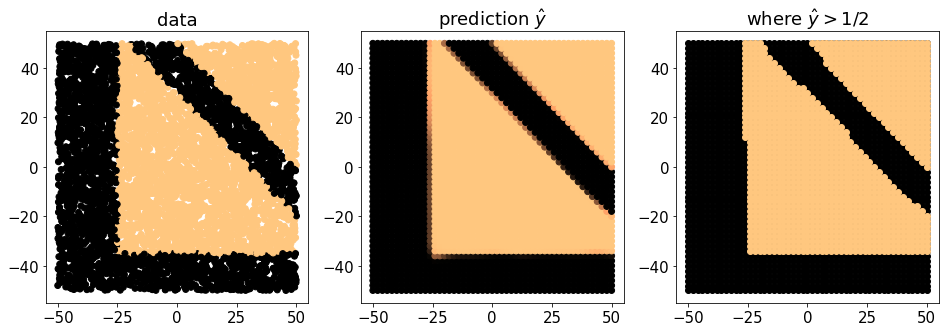

In [40]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model_increased.predict(grid_r)

fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
ax.set_title("data")

ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
ax.set_title("prediction $\\hat y$")

ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show

### Augmented number of sample

We decided to not augment the validation set since we want to obtain an accurate estimation of the error and adding artificial data would compromise the logic behind this validation procedure.    

In [43]:
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')

N=len(x)
perc_train=0.8
N_train = int(N*perc_train)

(x_train, y_train) = (x[0:N_train],y[0:N_train]) #they are already shuffle 
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

x_aug = x_train + np.random.normal(0, 0.05, size=x_train.shape)
y_aug = np.copy(y_train)

x_train = np.vstack((x_train, x_aug))
y_train = np.hstack((y_train, y_aug))
print('After augmentation')
print("Train:",len(x_train),"\t Validation:",len(x_valid))

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

Train: 3200 	 Validation: 800
After augmentation
Train: 6400 	 Validation: 800


In [44]:
#optimization
nepochs=400
model_augmented = compile_model(optimizer=grid_result.best_params_['optimizer'], 
                              act_func=grid_result.best_params_['act_func'],
                              neurons=grid_result.best_params_['model__neurons'])

history_augmented = model_augmented.fit(x_train, y_train,
                                      epochs = nepochs,
                                      batch_size = grid_result.best_params_['batch_size'],
                                      validation_data=(x_valid,y_valid),
                                      verbose=1)

Epoch 1/400
640/640 [==============================] - 2s 2ms/step - loss: 0.5974 - accuracy: 0.6750 - val_loss: 0.5753 - val_accuracy: 0.7025
Epoch 2/400
640/640 [==============================] - 1s 2ms/step - loss: 0.5264 - accuracy: 0.7450 - val_loss: 0.4916 - val_accuracy: 0.7688
Epoch 3/400
640/640 [==============================] - 1s 2ms/step - loss: 0.4743 - accuracy: 0.7684 - val_loss: 0.4668 - val_accuracy: 0.7800
Epoch 4/400
640/640 [==============================] - 1s 2ms/step - loss: 0.4533 - accuracy: 0.7852 - val_loss: 0.4369 - val_accuracy: 0.8388
Epoch 5/400
640/640 [==============================] - 1s 2ms/step - loss: 0.4222 - accuracy: 0.8330 - val_loss: 0.3948 - val_accuracy: 0.8562
Epoch 6/400
640/640 [==============================] - 1s 2ms/step - loss: 0.3777 - accuracy: 0.8573 - val_loss: 0.3447 - val_accuracy: 0.8675
Epoch 7/400
640/640 [==============================] - 1s 2ms/step - loss: 0.3382 - accuracy: 0.8614 - val_loss: 0.3199 - val_accuracy: 0.8575

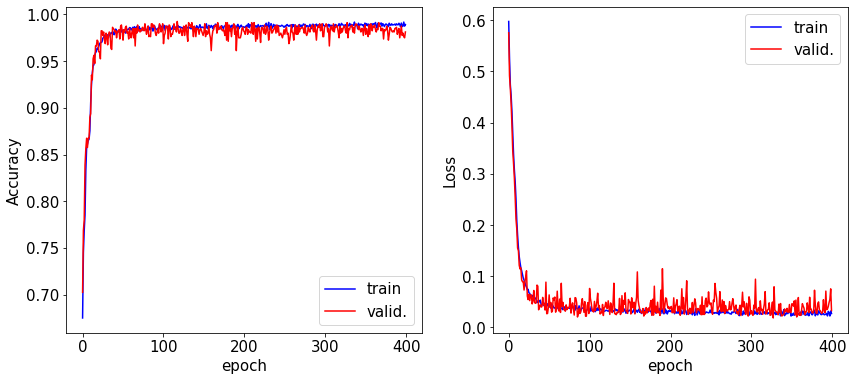

In [45]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(history_augmented.history['accuracy'],label="train",c="b")
ax.plot(history_augmented.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(history_augmented.history['loss'],label="train",c="b")
ax.plot(history_augmented.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

51 2601
[50. 50.]


<function matplotlib.pyplot.show(close=None, block=None)>

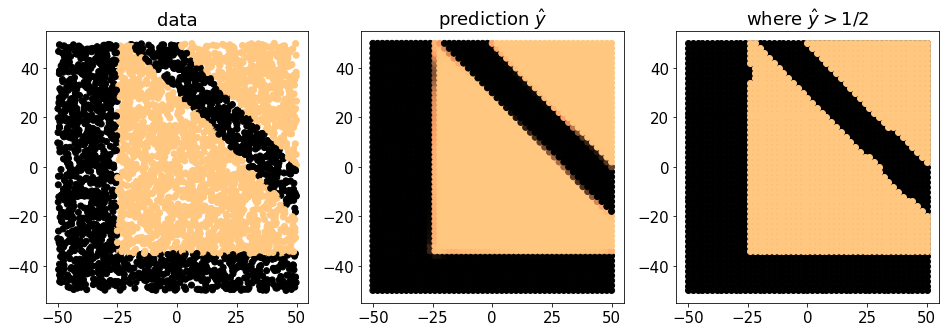

In [46]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model_augmented.predict(grid_r)

fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
ax.set_title("data")

ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
ax.set_title("prediction $\\hat y$")

ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show

## Ex.3 Non linearly seperable data

In [49]:
TYPE = 2

x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(f'Dimension of a sample{L}')

#training percentage
perc_train = 0.8

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

Dimension of a sample2
data: 4000
train: 3200


In [50]:
### Split training and test data
(x_train, y_train) = (x[0:N_train],y[0:N_train]) #they are already shuffle 
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [51]:
def Rescale(x):
    return x/50 #the number goes from -50 to 50, so we put them between -1 and 1 to use the non linearity 

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

<function matplotlib.pyplot.show(close=None, block=None)>

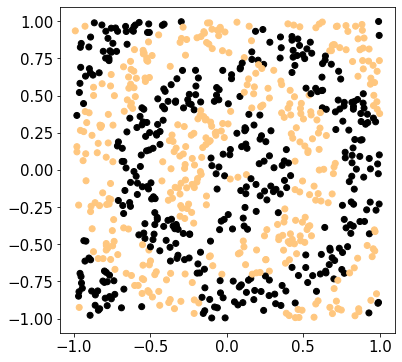

In [53]:
plt.figure(figsize = (6,6))
plt.scatter(x_valid[:,0],x_valid[:,1],c=y_valid)
plt.show

In [59]:
def create_DNN(act_func, neurons): 
    model = Sequential() #empty template of the neural network
    model.add(Dense(L,input_shape=(L,),activation=act_func)) #add a layer dense (all connection) with a ReLu 2 neuron for 2 x_i
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dropout(0.01)) #it is applied to the last layer, need to be reader in keras documentation 
    model.add(Dense(1,activation='sigmoid'))

    return model 

In [60]:
def compile_model(optimizer='adam', act_func='relu', neurons=20):
    model = create_DNN(act_func, neurons)
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])    
    return model

In [61]:
model_nonlinear = compile_model(optimizer=grid_result.best_params_['optimizer'], 
                              act_func='ReLU',
                              neurons=grid_result.best_params_['model__neurons'])

nepoch=400
history_nonlinear = model_nonlinear.fit(x_train, y_train,
               epochs = nepoch, batch_size = grid_result.best_params_['batch_size'],
               validation_data=(x_valid,y_valid),
               verbose=1)

Epoch 1/400
320/320 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.4863
Epoch 2/400
320/320 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5072 - val_loss: 0.6917 - val_accuracy: 0.5225
Epoch 3/400
320/320 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5131 - val_loss: 0.6927 - val_accuracy: 0.5025
Epoch 4/400
320/320 [==============================] - 1s 2ms/step - loss: 0.6900 - accuracy: 0.5437 - val_loss: 0.6944 - val_accuracy: 0.4950
Epoch 5/400
320/320 [==============================] - 1s 3ms/step - loss: 0.6894 - accuracy: 0.5416 - val_loss: 0.6877 - val_accuracy: 0.5337
Epoch 6/400
320/320 [==============================] - 1s 2ms/step - loss: 0.6880 - accuracy: 0.5409 - val_loss: 0.6866 - val_accuracy: 0.5537
Epoch 7/400
320/320 [==============================] - 1s 3ms/step - loss: 0.6868 - accuracy: 0.5391 - val_loss: 0.6844 - val_accuracy: 0.5550

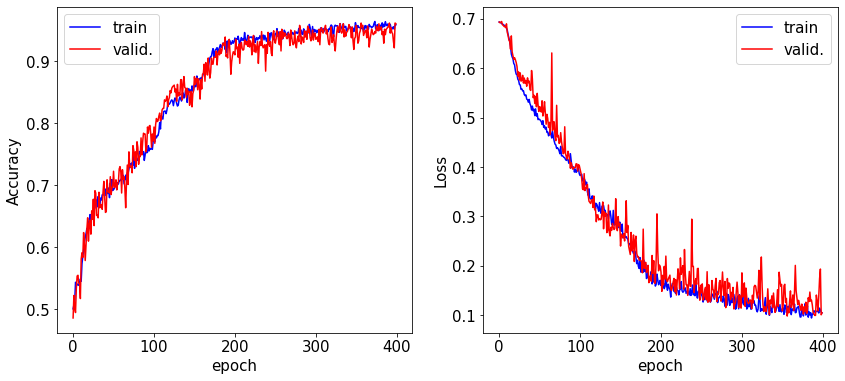

In [62]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(history_nonlinear.history['accuracy'],label="train",c="b")
ax.plot(history_nonlinear.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(history_nonlinear.history['loss'],label="train",c="b")
ax.plot(history_nonlinear.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [64]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model_nonlinear.predict(grid_r)

fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
ax.set_title("data")

ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
ax.set_title("prediction $\\hat y$")

ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
ax.set_title("where $\\hat y > 1/2$")

plt.show
plt.show